# Module 1: Fundamentals of Sound and Digital Audio

Welcome to Module 1 of the Audio Processing Tutorial!  
In this module we will:

- **Define** what sound is (pressure waves, amplitude, frequency)  
- **Explore** how sound is digitised (sampling, bit-depth, quantisation noise)  
- **Compare** common file formats (WAV, MP3, FLAC)  

**By the end of this module you will be able to:**  
1. Generate and listen to pure sine waves.  
2. Visualise waveforms and understand sampling-rate effects.  
3. Load audio at different sample rates and hear the quality differences.



## What Is Sound? <a id="what-is-sound"></a>

Sound is a mechanical wave that propagates through a medium (air, water, or solids) as oscillations of pressure.

- **Pressure wave:** Alternating regions of compression (high pressure) and rarefaction (low pressure).  
- **Amplitude (A):** The maximum pressure deviation from ambient—perceived as loudness.  
- **Frequency (f):** Number of pressure oscillations per second (Hz)—perceived as pitch.  
- **Waveform:** The shape of the pressure variation over time (e.g. sine, square, sawtooth), which determines timbre.


## Notebook Demos <a id="notebook-demos"></a>

In this section we will:

1. **Load & play** our MP3 demo file.  
2. **Visualise** its waveform at sample-level resolution.  
3. **Compare** playback at different sampling rates to hear aliasing/quality differences.


## Interactive Track Explorer

In this cell you can **select** one of four audio clips and immediately:

1. **Visualise** the first 0.5 s of its waveform  
2. **Visualise** a mid-segment (5.0 – 5.5 s) if the clip is long enough  
3. **Play** the entire track at its native sampling rate  

---

### How to use

1. **Choose a track** from the **Select track** dropdown:  
   - **Grusel Melodie** – a percussive, high-harmonic melody  
   - **Jzwschscan** – a vocal snippet with sibilance  
   - **Sweep (synthetic chirp)** – a pure tone sweep up to 20 kHz  
   - **Ambient Music** – a low-energy background loop  

2. As soon as you make a selection, the cell will clear its previous output and:  
   - Plot the **first 0.5 seconds** of the waveform  
   - Plot the **5.0–5.5 s window** (if available) to show how the texture evolves  
   - Display a ▶️ Play button and start playback at the clip’s native sample rate  

---

### What you’ll see

- **Waveform shape**: loud, transient-rich clips (e.g. Grusel Melodie) will show sharp peaks; ambient loops may appear almost flat in the first 0.5 s.  
- **Mid-segment**: helps you compare steady state vs. attack sections.  
- **Audio playback**: lets you immediately hear each clip at full fidelity.

Experiment with different tracks to get a feel for how waveform shapes correlate with the sound you hear!


In [13]:
import librosa
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Audio, display, clear_output
import ipywidgets as widgets

# Mapping of display names to filenames
track_options = {
    'Grusel Melodie':        'grusel-melodie-305360.mp3',
    'Jzwschscan':            'jzwschscan-28009.mp3',
    'Sweep (synthetic chirp)': 'sweep2-92802.mp3',
    'Ambient Music':         '22-musica-ambiente-67854.mp3'
}

def show_track(track_name):
    clear_output(wait=True)
    filename = track_options[track_name]
    
    # Load at native rate
    y, sr = librosa.load(filename, sr=None, mono=True)
    
    # Plot first 0.5 s
    duration_plot = 0.5
    n_plot = int(sr * duration_plot)
    t = np.linspace(0, duration_plot, n_plot, endpoint=False)
    plt.figure(figsize=(8, 2))
    plt.plot(t, y[:n_plot])
    plt.title(f'Waveform of "{track_name}" (first {duration_plot}s)')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.show()
    
    # Plot a mid‐segment (5.0–5.5 s) if long enough
    if len(y) > sr * 5.5:
        start_time, mid_dur = 5.0, 0.5
        start_sample = int(start_time * sr)
        n_mid = int(mid_dur * sr)
        t_mid = np.linspace(start_time, start_time + mid_dur, n_mid, endpoint=False)
        plt.figure(figsize=(8, 2))
        plt.plot(t_mid, y[start_sample:start_sample + n_mid])
        plt.title(f'Waveform of "{track_name}" ({start_time}–{start_time+mid_dur}s)')
        plt.xlabel('Time (s)')
        plt.ylabel('Amplitude')
        plt.show()
    
    # Play full track
    print(f'▶️ Playing "{track_name}" at {sr} Hz')
    display(Audio(y, rate=sr, autoplay=True))

widgets.interact(
    show_track,
    track_name=widgets.Dropdown(
        options=list(track_options.keys()),
        description='Select track:',
        value='Grusel Melodie'
    )
)


interactive(children=(Dropdown(description='Select track:', options=('Grusel Melodie', 'Jzwschscan', 'Sweep (s…

<function __main__.show_track(track_name)>

## Interactive Resampling Demo (Play / Stop + Amplitude Plot)

Use the controls below to select an audio track, enter any down-sampling rate in Hz, then click **Play** to hear the clip resampled to that rate (and plotted at the top). Click **Stop** to halt playback.

---

### How to use

1. **Select a track** from the dropdown.  
2. **Enter** a sampling rate (in Hz).  
3. Click **Play** to:
   - Resample via `ffmpeg` (through pydub),  
   - Plot the **first 50 ms** of the resampled waveform,  
   - Play back the entire clip at the same rate.  
4. Click **Stop** to clear the plot and audio.

---

### Why “Ambient Music” sometimes looks and sounds unchanged

If you choose **Ambient Music**, you’ll notice the amplitude plot remains a flat line whether you down-sample to 44 100 Hz or as low as 3 000 Hz—and you won’t hear any audible difference. That’s because this particular track begins with almost complete silence (or a very low-level fade-in), so the first 50 ms contain virtually no signal energy (see the first panel for Ambient Music at both 44 100 and 3 000 Hz :contentReference[oaicite:0]{index=0}). Down-sampling silence still yields silence!

---

### When you will hear a change

To perceive the effect of different sampling rates, pick a clip with strong transient or high-frequency content:

- **Grusel Melodie**: clear percussive attack, lots of high-frequency harmonics  
- **Jzwschscan**: voice/vocal bursts with sibilance  
- **Sweep (synthetic)**: a sine-sweep up into 20 kHz  

As you lower the rate below half your target (the Nyquist limit), you’ll see the waveform “thin out” in the plot and hear loss of brightness or aliasing artifacts.  

---

### Recommended rate ranges

- **≤ 8 000 Hz**: heavy high-end loss, thin/muffled or even silent if content is above 4 kHz  
- **16 000–22 050 Hz**: speech-quality or telephone-quality — decent midrange but missing air  
- **44 100 Hz**: CD-quality — full audible band  
- **> 44 100 Hz**: no further audible benefit for most recordings  


In [10]:
import io
import os
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display, Audio, clear_output
from pydub import AudioSegment

# Map friendly names to filenames
track_options = [
    ('Grusel Melodie',       'grusel-melodie-305360.mp3'),
    ('Jzwschscan',           'jzwschscan-28009.mp3'),
    ('Sweep (synthetic)',    'sweep2-92802.mp3'),
    ('Ambient Music',        '22-musica-ambiente-67854.mp3')
]

track_dropdown = widgets.Dropdown(
    options=track_options,
    description='Track:'
)
play_button = widgets.Button(description="Play")
stop_button = widgets.Button(description="Stop")
sampling_rate_input = widgets.IntText(value=44100, description="Rate (Hz):")
output = widgets.Output()

def play_audio(b):
    with output:
        clear_output()
        sr = sampling_rate_input.value
        filename = track_dropdown.value
        # Load and resample via pydub/ffmpeg
        audio = AudioSegment.from_file(filename)
        seg = audio.set_frame_rate(sr)
        
        # Extract samples for plotting (first 50 ms)
        samples = np.array(seg.get_array_of_samples())
        if seg.channels == 2:
            # use left channel for display
            samples = samples.reshape((-1, 2))[:, 0]
        n_plot = int(sr * 0.05)
        samples_plot = samples[:n_plot]
        t = np.linspace(0, n_plot/sr, n_plot, endpoint=False)
        
        # Plot amplitude
        plt.figure(figsize=(8, 2))
        plt.plot(t, samples_plot)
        track_label = os.path.splitext(os.path.basename(filename))[0]
        plt.title(f'{track_label} @ {sr} Hz (first 50 ms)')
        plt.xlabel('Time (s)')
        plt.ylabel('Amplitude')
        plt.show()
        
        # Play the full resampled audio
        buf = io.BytesIO()
        seg.export(buf, format='wav')
        buf.seek(0)
        print(f"▶️ Playing {track_label} at {sr} Hz")
        display(Audio(data=buf.read(), rate=sr, autoplay=True))

def stop_audio(b):
    with output:
        clear_output()
        print("Audio stopped.")

play_button.on_click(play_audio)
stop_button.on_click(stop_audio)

display(
    track_dropdown,
    widgets.HBox([play_button, stop_button]),
    sampling_rate_input,
    output
)


Dropdown(description='Track:', options=(('Grusel Melodie', 'grusel-melodie-305360.mp3'), ('Jzwschscan', 'jzwsc…

IntText(value=44100, description='Rate (Hz):')

Output()

### Pure‐Tone Generator & Waveform Visualiser (Text‐Box + Play/Stop)

In this cell you can generate a custom sine wave by typing in a frequency (Hz) and an amplitude (0–1), then using **Play** and **Stop** to control playback. You’ll also see the first 5 ms of the waveform plotted above the audio player.

**How to use**  
1. Enter a **frequency** (Hz) in the **Freq** box.  
2. Enter an **amplitude** (0–1) in the **Amp** box.  
3. Click **Play** – the waveform for the first 5 ms appears and the tone plays.  
4. Click **Stop** to halt playback and clear the plot.

---

#### Note on low frequencies  
Although human hearing spans roughly 20 Hz–20 kHz, most laptop/phone speakers and our ears are **far less sensitive** below a few hundred Hz. If you enter a very low frequency (e.g. under **300 Hz**), you may not hear the tone clearly (or at all) unless you raise the amplitude. Try frequencies from **400 Hz** up to **10 kHz** for the best audibility on typical speakers.

Experiment with different values to see how pitch (frequency) and loudness (amplitude) interact—and observe how the waveform changes on each play!


In [15]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Audio, display, clear_output
import ipywidgets as widgets

# Output area for plot + audio widget
output = widgets.Output()

# Text boxes for frequency and amplitude
freq_input = widgets.IntText(
    value=1000,
    description='Freq (Hz):',
    continuous_update=False
)
amp_input = widgets.FloatText(
    value=0.5,
    description='Amp (0–1):',
    continuous_update=False
)

# Play & Stop buttons
play_button = widgets.Button(description='Play')
stop_button = widgets.Button(description='Stop')

def play_sine(b):
    with output:
        clear_output(wait=True)
        sr = 44100
        duration = 1.0  # seconds
        t = np.linspace(0, duration, int(sr * duration), endpoint=False)
        freq = freq_input.value
        amp = amp_input.value
        
        # generate sine wave
        y = amp * np.sin(2 * np.pi * freq * t)

        # Plot first 5 ms
        zoom_ms = 0.005
        n_zoom = int(sr * zoom_ms)
        plt.figure(figsize=(6, 2))
        plt.plot(t[:n_zoom], y[:n_zoom])
        plt.title(f'{freq} Hz sine @ amplitude {amp}')
        plt.xlabel('Time (s)')
        plt.ylabel('Amplitude')
        plt.show()

        # Play the tone
        display(Audio(y, rate=sr, autoplay=True))

def stop_sine(b):
    with output:
        clear_output(wait=True)
        print("▶️ Playback stopped.")

play_button.on_click(play_sine)
stop_button.on_click(stop_sine)

# Display controls + output
display(widgets.VBox([
    freq_input,
    amp_input,
    widgets.HBox([play_button, stop_button]),
    output
]))


## Sampling Theorem Visualiser

**Nyquist sampling** is the rule that to capture (and later perfectly reconstruct) a signal containing frequencies up to *F* Hz, you must sample at least twice that rate—i.e. at *2F* samples per second.  

> **In plain English:**  
> - If you sample faster than twice the highest frequency in your sound, each “dot” (sample) lands exactly on the true waveform and you lose no information.  
> - If you sample slower than twice that frequency, your samples can “miss” the peaks and troughs and trick you into reconstructing a completely wrong, lower-frequency signal. That mistake is called **aliasing**.  

In the cell below you’ll see **three** subplots:

1. **Continuous-time sine** (ideal)  
   - A smooth 3 kHz sine wave at very high resolution.  
2. **Sampled at Nyquist** (`fs = 2·f₀`, here 2×3 kHz = 6 kHz)  
   - Blue circles and stems lie perfectly on the grey dashed sine—this is the minimum rate for exact reconstruction.  
3. **Sampled below Nyquist** (`fs = 1·f₀`, here 1×3 kHz = 3 kHz)  
   - Orange squares and stems no longer follow the sine, illustrating aliasing (peaks vanish or flip, even appearing as a DC line).

**What to observe**  
- Above or at Nyquist, sample points align with the continuous curve—**no loss** of information.  
- Below Nyquist, sample points misrepresent the waveform—**aliasing** errors appear.

**How to experiment**  
- Edit the variables `f0`, `fs_above`, or `fs_below` in the code cell to try different signal or sampling frequencies.  
- Re-run the cell (Shift + Enter) to see how changing the sampling rate moves you in and out of the alias-free region.


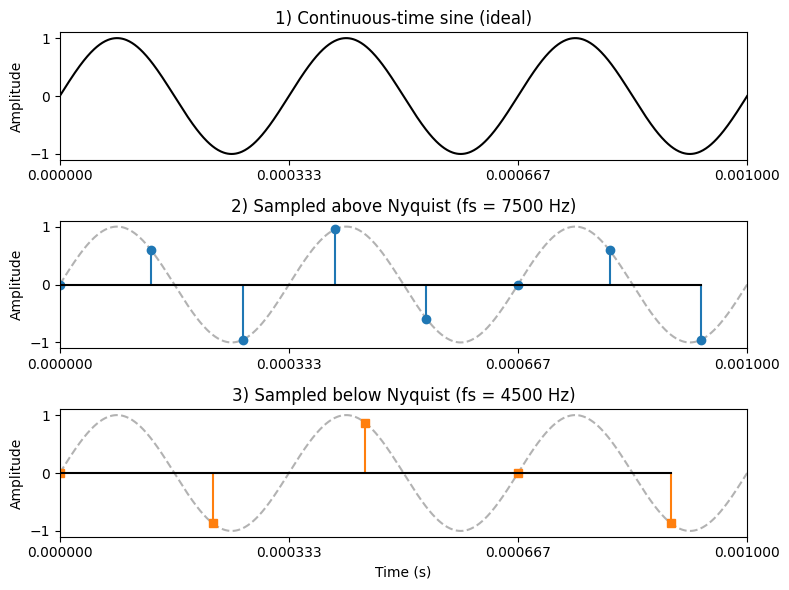

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Signal parameters
f0     = 3000.0       # signal frequency in Hz
cycles = 3            # how many cycles to show
duration = cycles / f0

# Continuous‐time (ideal) sine
t_cont = np.linspace(0, duration, 1000)
y_cont = np.sin(2 * np.pi * f0 * t_cont)

# Choose one rate above Nyquist (>2·f0) and one below (<2·f0)
fs_above = 2.5 * f0   # above Nyquist
fs_below = 1.5 * f0   # below Nyquist

# Sampled signals
t_above = np.arange(0, duration, 1/fs_above)
y_above = np.sin(2 * np.pi * f0 * t_above)

t_below = np.arange(0, duration, 1/fs_below)
y_below = np.sin(2 * np.pi * f0 * t_below)

# Plot them without shared x-axis so each is labelled
fig, axes = plt.subplots(3, 1, figsize=(8, 6), sharex=False)

# 1) Continuous
axes[0].plot(t_cont, y_cont, 'k')
axes[0].set_xlim(0, duration)
axes[0].set_xticks(np.linspace(0, duration, 4))
axes[0].set_title('1) Continuous-time sine (ideal)')
axes[0].set_ylabel('Amplitude')

# 2) Sampled above Nyquist
axes[1].plot(t_cont, y_cont, color='gray', linestyle='--', alpha=0.6)
axes[1].stem(t_above, y_above, linefmt='C0-', markerfmt='C0o', basefmt='k-')
axes[1].set_xlim(0, duration)
axes[1].set_xticks(np.linspace(0, duration, 4))
axes[1].set_title(f'2) Sampled above Nyquist (fs = {fs_above:.0f} Hz)')
axes[1].set_ylabel('Amplitude')

# 3) Sampled below Nyquist
axes[2].plot(t_cont, y_cont, color='gray', linestyle='--', alpha=0.6)
axes[2].stem(t_below, y_below, linefmt='C1-', markerfmt='C1s', basefmt='k-')
axes[2].set_xlim(0, duration)
axes[2].set_xticks(np.linspace(0, duration, 4))
axes[2].set_title(f'3) Sampled below Nyquist (fs = {fs_below:.0f} Hz)')
axes[2].set_xlabel('Time (s)')
axes[2].set_ylabel('Amplitude')

plt.tight_layout()
plt.show()


### Bit-Depth & Quantisation Noise Demo

**What is a bit & bit-depth?**  
- A **bit** is a binary digit that can be 0 or 1.  
- **Bit-depth** tells you how many bits are used to represent each audio sample.  
  - With **16-bit**, each sample can take one of 2¹⁶ (65 536) possible levels.  
  - With **8-bit**, only 2⁸ (256) levels — much coarser steps.  
  - Lower bit-depths mean fewer possible amplitude values, which introduces quantisation error (“steps”) and audible noise.

---

In this cell you can hear and see the effect of reducing the bit-depth on a clean 1 kHz sine wave:

1. **Choose a bit-depth** from the dropdown (16, 8, 4 or 2 bits).  
2. Click **Play** to generate a 1 kHz sine, quantise it to that bit-depth, plot the first 5 ms of the stepped waveform, and play back the result so you can hear the added “hiss” or distortion.

#### What to observe
- **16 bit**: nearly identical to the smooth sine (65 536 levels).  
- **8 bit**: you’ll see distinct steps and hear a light quantisation hiss (256 levels).  
- **4 bit**: coarse steps create noticeable distortion and more noise (16 levels).  
- **2 bit**: only 4 levels — the tone is barely recognisable, dominated by quantisation noise.  


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Audio, display, clear_output
import ipywidgets as widgets

# Output area
output = widgets.Output()

# Widget controls
bit_dropdown = widgets.Dropdown(
    options=[('16-bit (no quant.)', 16),
             ('8-bit', 8),
             ('4-bit', 4),
             ('2-bit', 2)],
    value=16,
    description='Bit-depth:'
)
play_button = widgets.Button(description='Play')

def quantise_and_play(b):
    with output:
        clear_output(wait=True)
        # Parameters
        sr = 44100
        duration = 1.0
        freq = 1000.0
        bits = bit_dropdown.value
        
        # Generate ideal sine
        t = np.linspace(0, duration, int(sr*duration), endpoint=False)
        y = np.sin(2*np.pi*freq*t)
        
        # Quantise to given bit-depth
        levels = 2**bits
        y_q = np.round((y + 1) * (levels/2 - 1)) / (levels/2 - 1) - 1
        
        # Plot first 5 ms
        zoom = int(0.005 * sr)
        plt.figure(figsize=(6,2))
        plt.plot(t[:zoom], y[:zoom], 'k--', alpha=0.6, label='Original')
        plt.step(t[:zoom], y_q[:zoom], 'C1', where='mid', label=f'{bits}-bit')
        plt.title(f'1 kHz sine quantised to {bits}-bit')
        plt.xlabel('Time (s)')
        plt.ylabel('Amplitude')
        plt.legend(loc='upper right')
        plt.show()
        
        # Play quantised audio
        print(f'▶️ Playing {bits}-bit quantised sine:')
        display(Audio(y_q, rate=sr, autoplay=True))

play_button.on_click(quantise_and_play)

# Display UI
display(widgets.VBox([bit_dropdown, play_button, output]))


### File-Format Comparison: WAV vs. MP3 vs. FLAC

In this cell we take the **first 3 seconds** of our original MP3 clip and export it to three formats:

1. **WAV (PCM)** – uncompressed, largest file size, perfect reproduction  
2. **MP3 (lossy)** – smaller file size, may show compression artifacts (smearing, pre-echo)  
3. **FLAC (lossless)** – compressed without any quality loss, moderate file size  

**What to expect**  
- WAV → largest size, crystal-clear sound  
- MP3 → smallest size, listen for subtle artifacts  
- FLAC → intermediate size, identical quality to WAV  

**How it works**  
1. We load the MP3 and take a 3 s snippet.  
2. We export that snippet to WAV and FLAC using pydub/ffmpeg.  
3. We display a small table of file sizes (in KB).  
4. We embed three ▶️ players so you can A/B/C them back-to-back.

In [11]:
import os
import pandas as pd
import numpy as np
import librosa
from pydub import AudioSegment
from IPython.display import Audio, display

# 1) Load your ADPCM WAV into numpy (librosa handles decoding)
y, sr = librosa.load('REC002.WAV', sr=None, mono=True)

# 2) Convert float32 [-1,1] → int16 PCM
y_int16 = np.int16(y * 32767)

# 3) Build a pydub AudioSegment from raw PCM bytes
segment = AudioSegment(
    data=y_int16.tobytes(),
    sample_width=2,      # 16-bit = 2 bytes
    frame_rate=sr,
    channels=1
)

# 4) Take a 3 s snippet
clip = segment[:3000]    # first 3000 ms

# 5) Export snippet to WAV (PCM), FLAC, MP3
clip.export('snippet.wav',  format='wav')   # default is pcm_s16le
clip.export('snippet.flac', format='flac')
clip.export('snippet.mp3',  format='mp3')

# 6) Gather file sizes
files = {'WAV':'snippet.wav', 'MP3':'snippet.mp3', 'FLAC':'snippet.flac'}
rows = []
for fmt, fname in files.items():
    size_kb = os.path.getsize(fname) / 1024
    rows.append({'Format':fmt, 'Filename':fname, 'Size (KB)':f'{size_kb:.1f}'})
df = pd.DataFrame(rows)
display(df)

# 7) Play each version (FLAC via librosa for compatibility)
for fmt, fname in files.items():
    size = df.loc[df.Format==fmt, 'Size (KB)'].values[0]
    print(f'▶️ {fmt} ({size} KB)')
    if fmt=='FLAC':
        y2, sr2 = librosa.load(fname, sr=None, mono=True)
        display(Audio(y2, rate=sr2, autoplay=True))
    else:
        display(Audio(filename=fname, autoplay=True))


Format      Filename Size (KB)
0    WAV   snippet.wav     281.3
1    MP3   snippet.mp3      23.9
2   FLAC  snippet.flac     185.3

▶️ WAV (281.3 KB)


▶️ MP3 (23.9 KB)


▶️ FLAC (185.3 KB)


### Exercise: Record & Resample

1. **Record** a 3-second audio clip on your phone and upload it to this notebook directory (e.g. `your_clip.wav`).  
2. **Run** the cell below to:
   - **Load** your clip at its native rate  
   - **Plot** the original waveform (first 0.5 s)  
   - **Play** the original audio  
   - **Down-sample** to 8 kHz  
   - **Plot** the down-sampled waveform (first 0.5 s)  
   - **Play** the down-sampled audio  
3. **Compare** the two players—note the loss of high-frequency detail and any aliasing artifacts.

## Module 1: Summary & Quiz

**Key take-aways**  
- **Sound** is a pressure wave characterised by **amplitude** (loudness) and **frequency** (pitch).  
- **Nyquist theorem**: to capture all information, sample at least twice the highest frequency present.  
- **Bit-depth** determines how many discrete amplitude levels you can represent—lower bit-depth adds quantisation noise (“hiss”).  
- **Resampling** to lower rates removes content above the new Nyquist limit, causing audio to sound dull or aliased.  
- **File formats**:  
  - **WAV** is uncompressed PCM.  
  - **FLAC** is lossless compressed PCM.  
  - **MP3** is lossy—once detail is lost, converting back to WAV/FLAC cannot restore it.

---

**Quick quiz**

1. **What happens** if you sample a 10 kHz sine wave at 15 kHz?  
   - A) Perfect reconstruction  
   - B) Aliasing → lower-frequency error  
   - C) No sound  

2. **Why** does a lower bit-depth introduce “hiss” into audio?  
   *(Short answer)*  

3. **True or False**: Converting an MP3 to WAV will improve its audio quality.  

> Submit your answers below or check the next cell for solutions!  



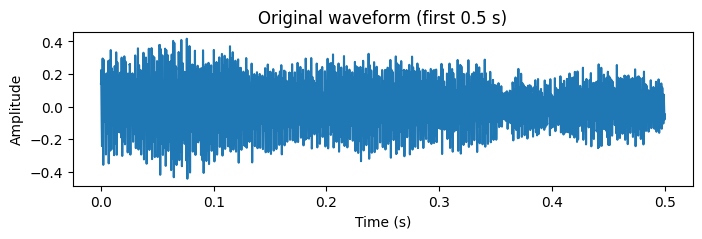

▶️ Playing original at 48000 Hz


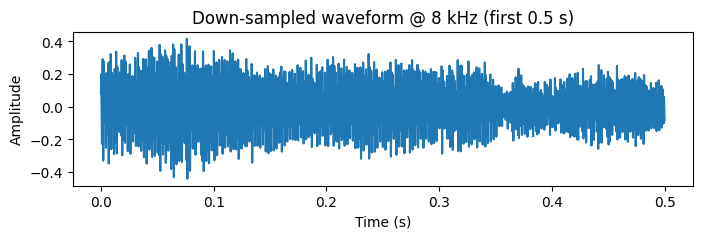

▶️ Playing down-sampled at 8 kHz


In [12]:
import numpy as np
import matplotlib.pyplot as plt
import librosa
from IPython.display import Audio, display

# 1) Load your clip
filename = 'REC002.WAV'    # ← change this to your uploaded file
y, sr = librosa.load(filename, sr=None, mono=True)

# 2) Plot & play original (first 0.5 s)
t0 = np.linspace(0, 0.5, int(sr*0.5), endpoint=False)
plt.figure(figsize=(8,2))
plt.plot(t0, y[:len(t0)])
plt.title('Original waveform (first 0.5 s)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()
print(f'▶️ Playing original at {sr} Hz')
display(Audio(y, rate=sr, autoplay=True))

# 3) Down-sample to 8 kHz and plot & play
y_8k = librosa.resample(y, orig_sr=sr, target_sr=8000)
t1 = np.linspace(0, 0.5, int(8000*0.5), endpoint=False)
plt.figure(figsize=(8,2))
plt.plot(t1, y_8k[:len(t1)])
plt.title('Down-sampled waveform @ 8 kHz (first 0.5 s)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()
print('▶️ Playing down-sampled at 8 kHz')
display(Audio(y_8k, rate=8000, autoplay=True))
